Epoch 1/10


c:\Users\A.S.T.co\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3281 - loss: 2.7853 - val_accuracy: 0.8452 - val_loss: 0.5082
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8774 - loss: 0.3992 - val_accuracy: 0.9206 - val_loss: 0.2871
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9598 - loss: 0.1649 - val_accuracy: 0.9365 - val_loss: 0.2279
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9767 - loss: 0.1024 - val_accuracy: 0.9405 - val_loss: 0.1992
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9971 - loss: 0.0554 - val_accuracy: 0.9405 - val_loss: 0.1903
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9981 - loss: 0.0471 - val_accuracy: 0.9405 - val_loss: 0.1791
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0285 - val_accuracy: 0.9405 - val_loss: 0.1733
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0211 - val_accuracy: 0.9444 - val_loss: 0.1711
Epo

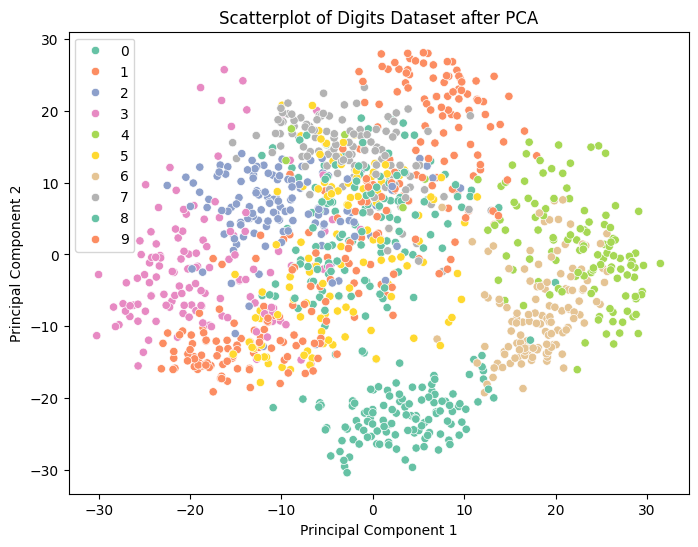

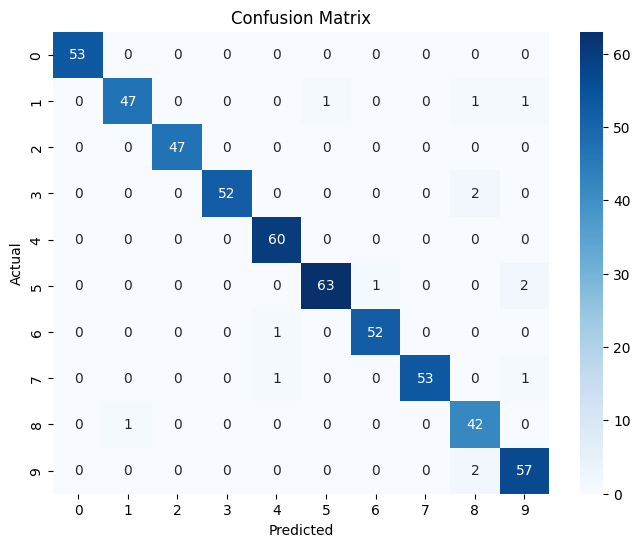

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the digits dataset
mnist = load_digits()
X = mnist.data
y = mnist.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Reshape the data to match the input shape for the neural network
X_train_pca = X_train_pca.reshape(X_train_pca.shape[0], -1)
X_test_pca = X_test_pca.reshape(X_test_pca.shape[0], -1)

# Build a simple neural network model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_pca.shape[1]),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output units for 10 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)
y_pred_classes = y_pred.argmax(axis=1)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Classification Report:\n", classification_report(y_test, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

# Scatter plot for the first two PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="Set2", legend='full')
plt.title('Scatterplot of Digits Dataset after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
